<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML/blob/master/Practicals/Practical4/SGD_MiniBatchGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shrey Viradiya
# 18BCE259

In [1]:
import numpy as np
import sklearn.datasets as skd
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(259)

In [3]:
X, y = skd.load_boston(return_X_y=True)
X, y = shuffle(X, y, random_state = 259)
X = scale(X)
X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
X_new[:,0] = np.ones(shape = (1,X.shape[0]))
X_new[:,1:] = X
X = X_new

In [4]:
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

### Stochastic Gradient Descent

In [5]:
# epochs
n_iter = 500

# Learning Rate
LR = 0.03

In [6]:
a, b = X_train.shape
thetas = np.random.uniform(0,1, size = (b))

In [7]:
thetas

array([0.69021991, 0.1008456 , 0.26613551, 0.87542591, 0.70853013,
       0.86330125, 0.8109315 , 0.60505036, 0.87763296, 0.28165856,
       0.71834225, 0.29260093, 0.4753621 , 0.85687412])

In [8]:
mse_history = []

In [9]:
for i in range(n_iter):
    for item in range(a):
        update = np.zeros(shape=(b))
        y_predicted = np.dot(X_train[item], thetas)
        error = y_predicted - y_train[item]
        for f in range(b):
            update[f] = error * X_train[item][f]
        thetas = thetas - (LR/(2*a)) * update
    mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))

In [10]:
thetas

array([22.4169073 , -0.71429901,  0.85483464, -0.3347295 ,  0.48976731,
       -1.28901513,  2.67611635,  0.02646179, -2.61044693,  1.08921557,
       -0.75495605, -1.86539062,  0.8076187 , -3.83754789])

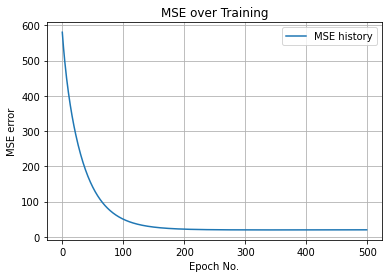

In [11]:
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.ylabel('MSE error')
plt.xlabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
y_tp = np.dot(X_test, thetas)

In [13]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.21478879737816

In [14]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

20.083872975758506

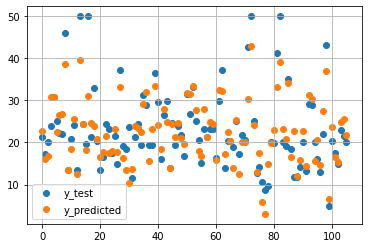

In [15]:
plt.scatter(y = y_test, x = range(len(y_test)), label = 'y_test')
plt.scatter(y = y_tp, x = range(len(y_test)), label = 'y_predicted')
plt.legend()
plt.grid(True)
plt.show()

**Plotting MSE for different Learning Rates**

In [16]:
def run_regressor(n_iter, LR):
    thetas = np.random.uniform(0,1, size = (b))
    mse_history = []
    for i in range(n_iter):
        for item in range(a):
            update = np.zeros(shape=(b))
            y_predicted = np.dot(X_train[item], thetas)
            error = y_predicted - y_train[item]
            for f in range(b):
                update[f] = error * X_train[item][f]
            thetas = thetas - (LR/(2*a)) * update
        mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))
    return mse_history

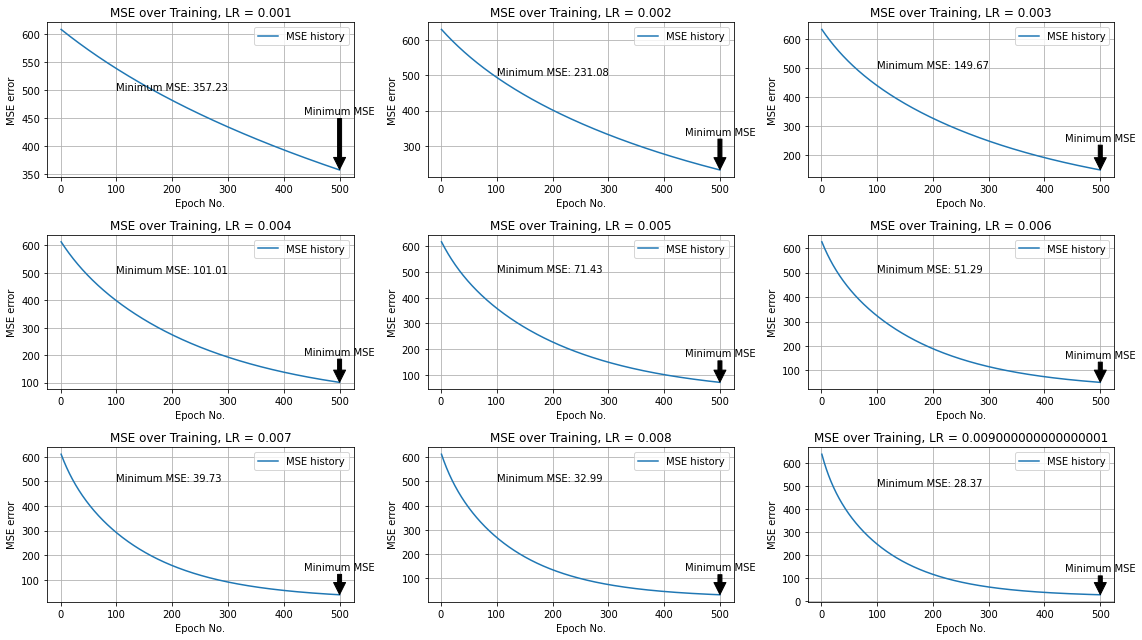

In [17]:
mse_errors = []

for i in np.array(range(1,10)) * 0.001:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()

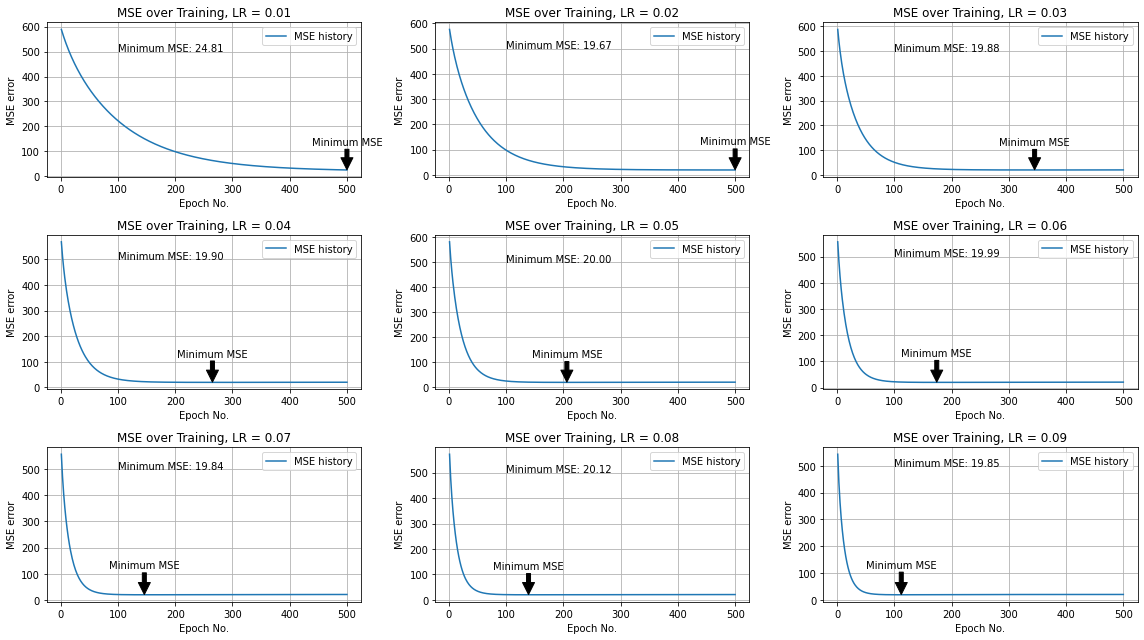

In [18]:
mse_errors = []

for i in np.array(range(1,10)) * 0.01:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()

## MiniBatch Gradient Descent

In [19]:
# epochs
n_iter = 500

# Learning Rate
LR = 0.03

# Batch Size
batch_s = 10

In [20]:
a, b = X_train.shape
thetas = np.random.uniform(0,1, size = (b))

In [21]:
thetas

array([0.67025828, 0.32716316, 0.52332499, 0.27143953, 0.34673349,
       0.82999395, 0.15339468, 0.70508657, 0.3801996 , 0.75592092,
       0.73137309, 0.39082545, 0.48735493, 0.66636123])

In [22]:
mse_history = []

In [23]:
for i in range(n_iter):
    for step in range(int(a//batch_s)):
        samples_idx = np.random.randint(0,a,size=batch_s)
        update = np.zeros(shape=(b))
        y_predicted = np.dot(X_train[samples_idx], thetas)
        error = y_predicted - y_train[samples_idx]
        for f in range(b):
            update[f] = np.sum(error * X_train[samples_idx].T[f])
        thetas = thetas - (LR/(2*a)) * update
    mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))

In [24]:
thetas

array([22.44768983, -0.72661219,  0.93674714, -0.3933613 ,  0.51593821,
       -1.30494609,  2.60538434,  0.06109734, -2.75575694,  1.20109292,
       -0.78894284, -1.89092909,  0.78567882, -3.92897085])

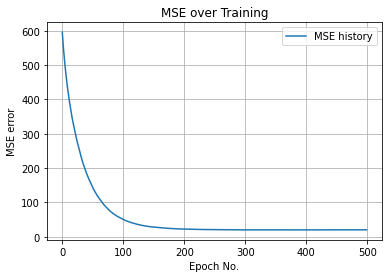

In [25]:
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.ylabel('MSE error')
plt.xlabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
y_tp = np.dot(X_test, thetas)

In [27]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.231265339977893

In [28]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

20.155233209641057

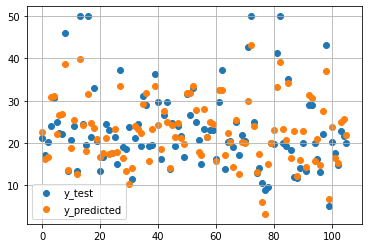

In [29]:
plt.scatter(y = y_test, x = range(len(y_test)), label = 'y_test')
plt.scatter(y = y_tp, x = range(len(y_test)), label = 'y_predicted')
plt.legend()
plt.grid(True)
plt.show()

**Plotting MSE for different Learning Rates**

In [30]:
def run_regressor(n_iter, LR):
    thetas = np.random.uniform(0,1, size = (b))
    mse_history = []
    for i in range(n_iter):
        for step in range(int(a//batch_s)):
            samples_idx = np.random.randint(0,a,size=batch_s)
            update = np.zeros(shape=(b))
            y_predicted = np.dot(X_train[samples_idx], thetas)
            error = y_predicted - y_train[samples_idx]
            for f in range(b):
                update[f] = np.sum(error * X_train[samples_idx].T[f])
            thetas = thetas - (LR/(2*a)) * update
        mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))
    return mse_history

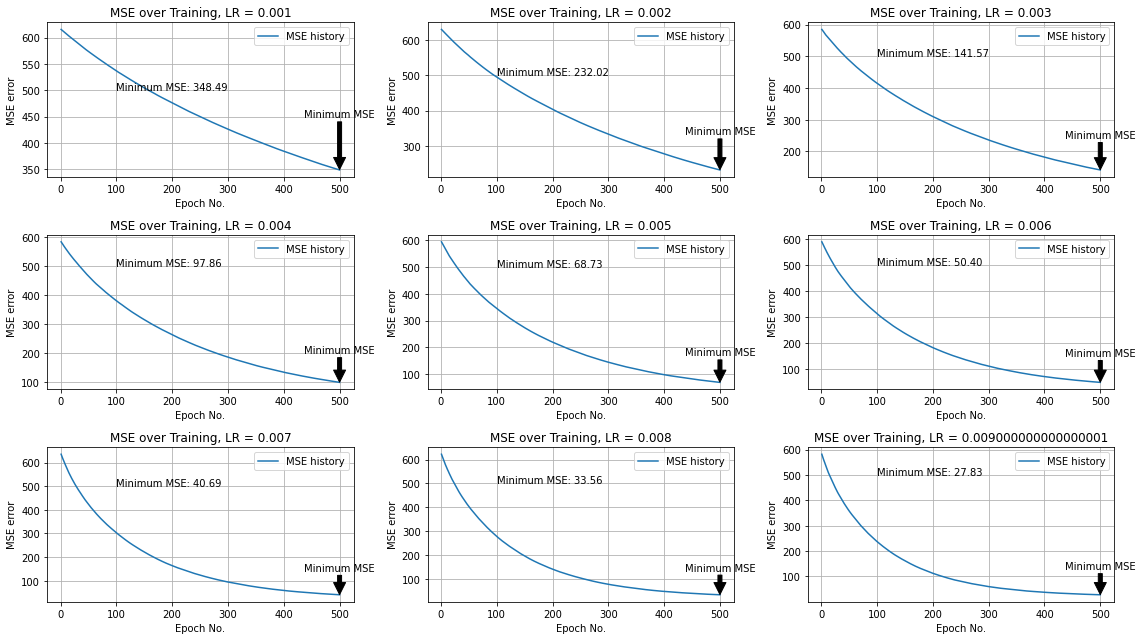

In [31]:
mse_errors = []

for i in np.array(range(1,10)) * 0.001:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()

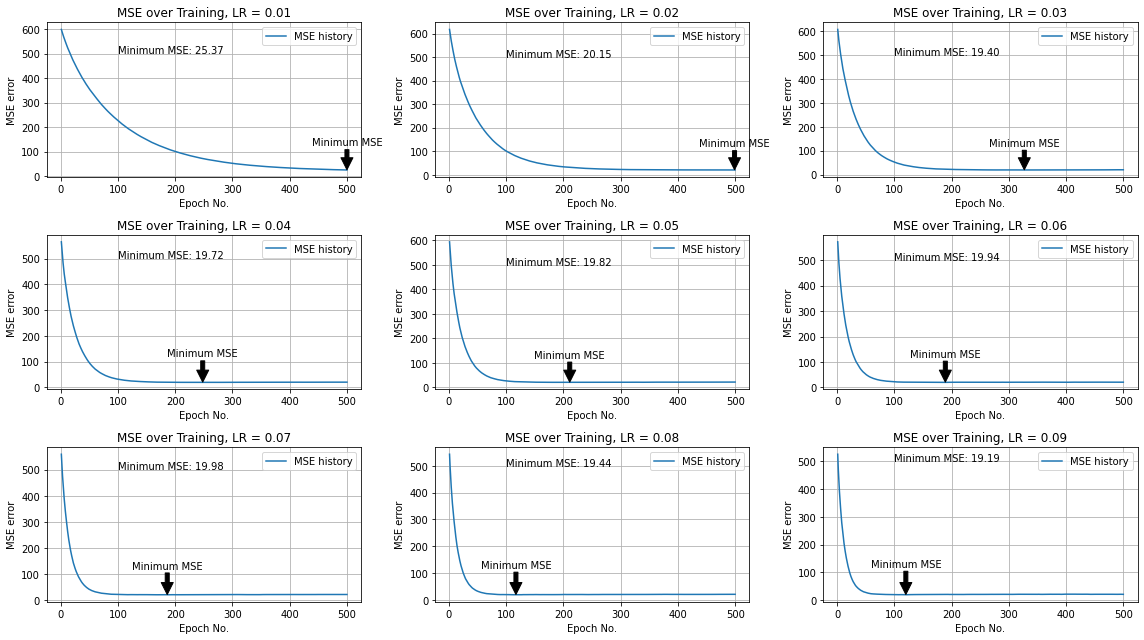

In [32]:
mse_errors = []

for i in np.array(range(1,10)) * 0.01:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()